<a href="https://colab.research.google.com/github/SupidchayaTangkidwanich/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [5]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [6]:
Name = 'สุพิชญา ตั้งกิจวานิชย์'
ID = '6230205420'

In [7]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [8]:
Data = DataGenerator(Name,ID)

020:30:22


In [9]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-5.235210,-2.860860,-0.805871,-6.856979,-6.777006,-8.583028,7.259264,1.447058,-4.348699,-11.271009,3.188789,-3.706942,2.009193,1.570851,9.985383,2.633004,-0.269312,9.070029,7.393669,-8.279610,-7.588774,-0.331426,4.126808,0.896063,-6.202212,-2.145307,-9.459880,-6.749552,-7.682965,4.194720,-5.721721,22.973601
1,9.510645,-11.724693,-5.819783,-0.784435,4.213936,9.149353,7.801894,1.899180,-2.084421,-0.698642,6.422391,3.871113,4.632243,-0.403535,6.446859,5.793426,-5.205285,0.412460,5.175845,-9.418035,-9.259097,10.100478,7.104180,4.488556,7.110296,-5.801875,-8.563083,4.534392,-1.015977,6.009005,-23.449386,32.045023
2,9.768125,-9.505962,-5.533852,-1.030323,4.315569,10.896623,7.123481,2.266101,-1.416885,-2.166934,2.684397,4.669916,6.283261,-2.630425,10.382282,5.216370,-5.983786,1.917078,3.739032,-10.258786,-9.797286,9.477836,5.785408,4.343419,8.028847,-4.558729,-7.085180,3.283552,-0.202463,5.715904,-19.011924,30.579518
3,0.265184,-3.451455,-6.242929,11.222199,-1.053836,4.398465,-6.825062,4.595991,3.862471,4.729208,9.165959,6.151587,-0.823517,9.247155,-6.436628,3.884506,8.047165,2.184967,2.046106,8.087513,-1.901367,0.155482,-1.531668,5.135129,-8.600767,-7.648380,-7.757502,5.174454,-4.832281,2.099184,-6.902911,12.495921
4,-1.146704,-7.142143,1.101740,7.364864,-9.830379,-2.518818,-0.905386,-2.886974,-7.672461,-5.743728,9.156414,-5.083711,-11.229786,-1.163712,2.759683,-2.571018,8.121640,-4.834813,9.562179,-2.797196,7.536796,0.250696,-6.008766,-9.761062,8.361335,7.242344,4.432262,-1.469124,-1.062886,6.270803,-14.284285,33.354013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.468904,1.508715,-5.344932,-10.006272,4.791907,-0.434561,-2.514041,-0.196371,-5.284415,-3.984139,0.066370,3.120663,-3.187021,-1.873491,-4.708044,2.196728,-6.470265,2.258201,4.821559,-7.505703,3.943361,-2.060711,4.861821,6.092516,6.662436,1.913058,4.627481,2.277454,-2.579394,2.949088,3.017429,16.745438
9996,-3.648360,-10.778105,-4.391808,-9.771854,-2.643268,2.147130,-9.317066,-10.317206,1.935296,3.543057,-4.064741,-5.384925,1.282269,-1.254489,-7.606798,9.634642,9.467173,7.251492,-10.231833,-7.762669,-7.127021,1.845076,1.811317,5.178686,3.237937,6.232463,-8.661862,1.788290,4.374740,-4.792314,-21.556211,-21.961569
9997,8.435509,-6.554998,-8.754114,-4.359208,4.330762,-1.767436,-4.784996,-5.611044,8.741600,0.262239,7.516994,1.931891,-6.907949,8.729823,0.912568,-9.401059,0.683269,-4.586662,6.855340,-2.787098,-6.923734,9.168708,-6.908518,4.623331,5.178249,8.891360,-0.605690,-8.514347,-2.075814,-4.940532,-13.109996,-22.702661
9998,0.127080,4.501513,-3.334955,-3.516207,8.116519,-10.444870,-4.854239,-7.782008,-5.369580,3.583364,-7.395462,-1.538423,0.956582,-3.833582,-3.877565,2.837093,6.527495,-2.057050,-7.983029,6.432964,5.527862,-3.140381,1.553203,-0.265407,3.904482,-7.439079,-6.935518,8.433059,6.970092,-8.077428,9.003027,-38.387138


# 2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

# clustering คือ การหาความสัมพันธ์ของข้อมูล เพื่อแบ่งข้อมูลออกเป็นกลุ่มๆ
จุดมุ่งหมายของการทำ คือ การจัดกลุ่มข้อมูลโดยดูจาก attributes ของข้อมูล


ตรวจสอบขนาดของข้อมูลว่า มี data กี่ตัว เเละมีกี่ dimensions

In [10]:
Data.shape # มีทั้งหมด 32 dimension

(10000, 32)

## เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น เเล้วลบมันออก

โดยจะเลือกเเต่ข้อมูลที่เป็นตัวเลข เเต่ข้อมูลนี้มีเเต่ตัวเลขอยู่เเล้วจึงไม่ต้องตัดออก

#### ตรวจสอบว่า ระหว่าง colums มี correlation กันมากน้อยเเค่ไหน ด้วย numpy

In [11]:
import numpy as np

In [12]:
corr = np.corrcoef(Data.to_numpy().T) # หา correlation

In [13]:
corr.shape

(32, 32)

In [14]:
corr

array([[ 1.        , -0.07709059, -0.03256027, ...,  0.20264864,
        -0.07709059,  0.20264864],
       [-0.07709059,  1.        ,  0.20168588, ...,  0.03084167,
         1.        ,  0.03084167],
       [-0.03256027,  0.20168588,  1.        , ..., -0.1431884 ,
         0.20168588, -0.1431884 ],
       ...,
       [ 0.20264864,  0.03084167, -0.1431884 , ...,  1.        ,
         0.03084167,  1.        ],
       [-0.07709059,  1.        ,  0.20168588, ...,  0.03084167,
         1.        ,  0.03084167],
       [ 0.20264864,  0.03084167, -0.1431884 , ...,  1.        ,
         0.03084167,  1.        ]])

In [15]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') # ค่าไหนที่เป็น 1 โดยที่ i,j ไม่เท่ากัน print เฉพาะ ค่า correlation เป็น 1 โดยไม่เอาเส้นทเเยงมุม

row = 29 column = 31 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0


พบว่ามีผลรันออกมา เเปลว่า มีค่าที่ซ้ำกันอยู่ในข้อมูลนี้

In [46]:
new_data = Data.iloc[:29,:-1]
new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,-5.235210,-2.860860,-0.805871,-6.856979,-6.777006,-8.583028,7.259264,1.447058,-4.348699,-11.271009,3.188789,-3.706942,2.009193,1.570851,9.985383,2.633004,-0.269312,9.070029,7.393669,-8.279610,-7.588774,-0.331426,4.126808,0.896063,-6.202212,-2.145307,-9.459880,-6.749552,-7.682965,4.194720,-5.721721
1,9.510645,-11.724693,-5.819783,-0.784435,4.213936,9.149353,7.801894,1.899180,-2.084421,-0.698642,6.422391,3.871113,4.632243,-0.403535,6.446859,5.793426,-5.205285,0.412460,5.175845,-9.418035,-9.259097,10.100478,7.104180,4.488556,7.110296,-5.801875,-8.563083,4.534392,-1.015977,6.009005,-23.449386
2,9.768125,-9.505962,-5.533852,-1.030323,4.315569,10.896623,7.123481,2.266101,-1.416885,-2.166934,2.684397,4.669916,6.283261,-2.630425,10.382282,5.216370,-5.983786,1.917078,3.739032,-10.258786,-9.797286,9.477836,5.785408,4.343419,8.028847,-4.558729,-7.085180,3.283552,-0.202463,5.715904,-19.011924
3,0.265184,-3.451455,-6.242929,11.222199,-1.053836,4.398465,-6.825062,4.595991,3.862471,4.729208,9.165959,6.151587,-0.823517,9.247155,-6.436628,3.884506,8.047165,2.184967,2.046106,8.087513,-1.901367,0.155482,-1.531668,5.135129,-8.600767,-7.648380,-7.757502,5.174454,-4.832281,2.099184,-6.902911
4,-1.146704,-7.142143,1.101740,7.364864,-9.830379,-2.518818,-0.905386,-2.886974,-7.672461,-5.743728,9.156414,-5.083711,-11.229786,-1.163712,2.759683,-2.571018,8.121640,-4.834813,9.562179,-2.797196,7.536796,0.250696,-6.008766,-9.761062,8.361335,7.242344,4.432262,-1.469124,-1.062886,6.270803,-14.284285
5,3.237981,-10.041340,6.921372,9.139610,-1.811758,4.083058,-1.218061,6.241727,-8.186429,8.820776,8.367247,-0.049164,1.456068,6.164904,-1.384513,-2.326784,-5.583512,5.405914,2.788672,-0.004892,10.262764,-3.549128,-4.407667,-4.615340,-1.915335,3.968756,-6.794000,2.647703,2.657459,-10.647012,-20.082679
6,3.924832,2.554358,-3.556597,-7.441416,4.810942,0.933662,-4.257332,0.361084,-5.215092,-6.054939,1.863476,0.071815,-2.864247,-0.285897,-5.402744,1.635490,-5.408854,2.025418,6.862015,-6.235889,5.615619,-1.014925,7.007400,6.054801,6.791691,1.837527,3.945915,1.762080,-1.588546,1.052840,5.108716
7,-7.419770,-2.672162,-9.019362,8.377052,9.888786,-8.475804,7.534594,8.494478,7.851648,5.062665,-5.906019,0.103891,9.935009,-2.468774,-8.534758,-5.699605,2.248798,-9.444070,2.899274,-7.715541,-3.039159,-7.190580,3.186379,-4.482233,4.768780,1.128016,-3.610483,-10.233380,10.307046,2.611541,-5.344323
8,2.143784,4.470094,3.762786,5.454297,-2.475080,-10.221335,7.408976,6.412814,0.238176,7.441850,-2.315128,6.663201,4.123039,1.675311,8.917008,9.766465,6.836752,-3.021466,-10.693057,7.828988,-9.258770,-3.158507,-5.101060,10.226713,-6.170506,-5.746906,-3.719818,-7.163724,2.824950,-8.938508,8.940187
9,1.293422,-3.709807,-5.720612,10.369531,0.441351,3.740084,-7.524001,4.678406,3.997640,4.899213,8.677553,4.235319,-1.968228,7.402187,-9.727087,4.737919,5.449008,2.164033,3.177618,10.043859,-2.367843,-1.156166,0.314334,3.680236,-9.307463,-9.185330,-8.948286,5.754804,-3.692173,1.487842,-7.419613


#### Kmean

##### Import

In [17]:
from sklearn.cluster import KMeans

##### Define

In [18]:
kmeans = KMeans(random_state=2021)

##### Fit - Transform

In [19]:
kmeans.fit(Data) # เเสดง จุด cluster centers ที่คำนวณออกมาได้

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [20]:
kmeans.cluster_centers_

array([[  1.71800027,  -6.21285349,  -1.12774587,   1.08655163,
          3.37243952,   3.04625098,  -3.35065459,  -1.61455118,
         -1.58375089,   2.1162272 ,   1.92544718,   1.29159736,
          2.1771463 ,   5.25350631,  -3.67140014,  -1.66639205,
          0.91935109,  -0.25174973,  -2.21661717,  -1.53858595,
         -0.9981979 ,  -0.70473828,  -1.35106356,  -1.07321597,
          0.08594281,   2.64674883,  -1.47108795,  -3.77812246,
         -2.71070997,  -6.22198749, -12.42570697, -29.10993746],
       [ -2.22293057,  -2.71369564,  -5.30166516,   8.69970758,
          3.54064169,  -3.79352741,   2.12936095,   3.19350558,
          5.28987227,   1.83380424,  -1.63631266,   1.26693807,
          0.17474392,  -0.53366663,  -6.72321254,   0.3708422 ,
          2.41148277,  -0.08176501,   3.03063704,  -1.94128075,
          0.51915599,  -4.28269633,  -2.09922295,  -1.2644428 ,
         -0.48565122,  -3.59826376,  -4.7600181 ,   2.23730764,
          5.26170295,   2.61897293,  -5

#### ทดสอบการจัดกลุ่มของ Data

In [21]:
y = kmeans.predict(Data)
y

array([2, 2, 2, ..., 0, 3, 1], dtype=int32)

## ทำ PCA เพื่อลด Dimension ของข้อมูลเนื่องจากมีจำนวน Dimension ที่เยอะเกินไป
เเละเป็นการวิธีการลด Dimension ของข้อมูล โดยจะรักษา Information ไว้ให้เยอะที่สุด

###### Import

In [22]:
from sklearn.decomposition import PCA

##### Define

In [23]:
pca = PCA(n_components=2)

#####  Fit - Transform

In [24]:
new_pca = pca.fit_transform(Data)

In [25]:
new_pca.shape # จะเห็นว่า dimension เหลือเเค่ 2 dimension

(10000, 2)

In [26]:
from matplotlib import pyplot as plt

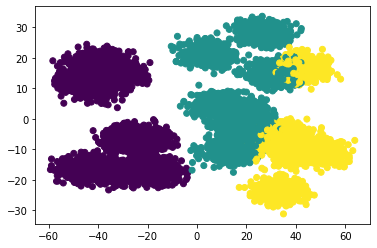

In [27]:
kmeans = KMeans(n_clusters=3,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

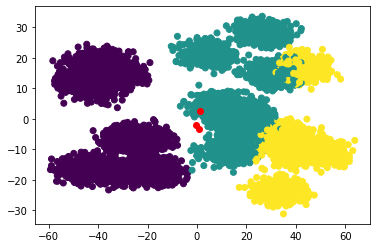

In [28]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y) # cluster center
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'or')

หลังจากนั้น จะทำการหาค่า k ว่าควรจะเป็นเท่าไหร่ โดบการใช้ Elbow Method ในการช่วยหาค่า k ที่เหมาะสม


##### SSE (Sum of Squared Errors)
SSE คือ ความไม่ใกล้เคียงกับจุดศูนย์กลางมากน้อยเท่าไหน

In [29]:
kmeans.inertia_

11134453.960132588

In [30]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k,random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [31]:
SSE

[21383197.695221562,
 12526383.352083936,
 11134453.960132588,
 9906995.413663898,
 9144006.591083162,
 8391396.655424077,
 7801784.776167525,
 7230682.0301326085]

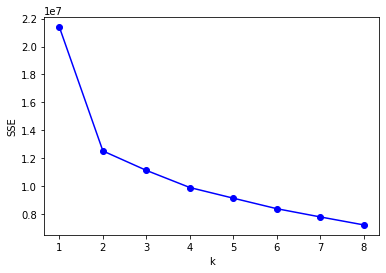

In [32]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b') 
plt.xlabel('k')
plt.ylabel('SSE');

## Silhouette coefficient  คือ วิธีไว้ใช้หาจำนวน k ที่เหมาะสมที่สุด

In [33]:
from sklearn import metrics

In [34]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k,random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

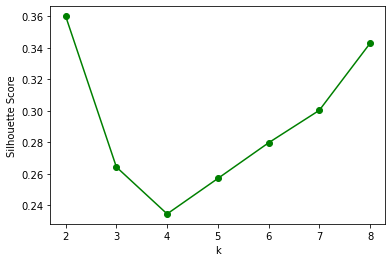

In [35]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g') # ทำการ Silhouette ดีที่สุดที่ คือ 2
plt.xlabel('k')
plt.ylabel('Silhouette Score');

# 3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

ใช้วิธี MDS (Multidimension Scaling) คือ การลดขนาดของตัวเเปร จากที่มีเยอะให้เหลือน้อยๆ

In [43]:
from sklearn.manifold import MDS

In [44]:
mds = MDS(n_components=2)

In [47]:
new_mds = mds.fit_transform(new_data)

In [48]:
kmeans_2 = KMeans(n_clusters=3,random_state=2021)
kmeans_2.fit(new_data)
g = kmeans_2.predict(new_data)

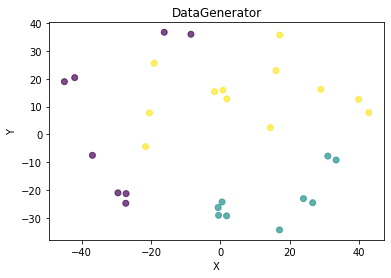

In [49]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

เปรียบเทียบระหว่างข้อ 2 กับ ข้อ 3 พบว่า หลังจากการลด dimension ของข้อมูลด้วย mds เเล้วข้อมูลมีการกระจายที่เเตกต่างกัน จากข้อ 2